In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree


In [3]:
df= pd.read_csv('wine_quality_red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'] = [1 if x>=6.5 else 0 for x in df['quality']]

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [8]:
df.shape

(1599, 12)

In [9]:
y = df['quality']
X = df.drop('quality', axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                   random_state = 42)

### KNearestNeighbor


In [12]:
test_scores = []
train_scores = []
for i in range(1,10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

max_test_score = max(test_scores)
max_test_index = test_scores.index(max_test_score)

ktest = range(1,10)
best_test_k = ktest[max_test_index]

max_train_score = max(train_scores)
max_train_index = train_scores.index(max_train_score)

ktrain = range(1,10)
best_train_k = ktrain[max_train_index]

print('Best k for train set: ' + str(best_train_k))
print('Best k for test set ' + str(best_test_k))

Best k for train set: 1
Best k for test set 5


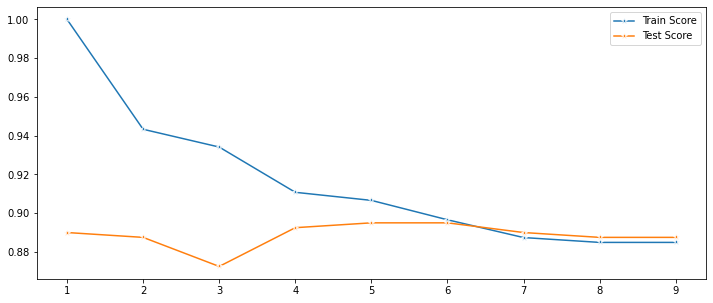

In [13]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10), y=train_scores,marker='*', label = 'Train Score')
p = sns.lineplot(x=range(1,10), y=test_scores,marker='*', label = 'Test Score')

In [14]:
kn = KNeighborsClassifier(n_neighbors = 5)
kn.fit(X_train, y_train)
pred_kn = kn.predict(X_test)
print(classification_report(y_test, pred_kn, labels = np.unique(pred_kn)))
print('KNAccuracy score: ' + str(accuracy_score(y_test, pred_kn)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       347
           1       0.64      0.47      0.54        53

    accuracy                           0.90       400
   macro avg       0.78      0.72      0.74       400
weighted avg       0.89      0.90      0.89       400

KNAccuracy score: 0.895


C:\Users\jerem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


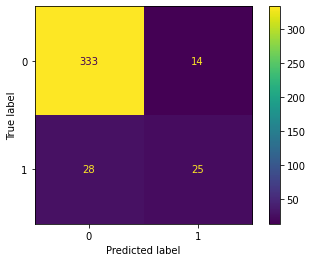

In [15]:
_ = plot_confusion_matrix(kn, X_test, y_test, values_format = '')
_ = plt.grid(False)
plt.show()

In [16]:
param_grid = {'n_neighbors' : np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score: " + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 0.8667946708463949
Best Parameters: {'n_neighbors': 39}


In [21]:
kn = KNeighborsClassifier(n_neighbors = 39)
kn.fit(X_train, y_train)
pred_kn = kn_cv.predict(X_test)
print(classification_report(y_test, pred_kn, labels = np.unique(pred_kn)))
print('KNN Accuracy score: ' + str(accuracy_score(y_test, pred_kn)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       347
           1       0.48      0.21      0.29        53

    accuracy                           0.86       400
   macro avg       0.68      0.59      0.61       400
weighted avg       0.83      0.86      0.84       400

KNN Accuracy score: 0.865


C:\Users\jerem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


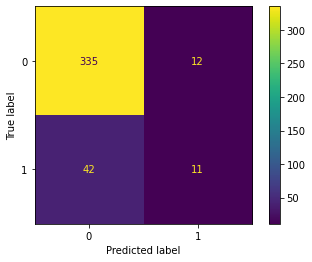

In [22]:
_ = plot_confusion_matrix(kn, X_test, y_test, values_format = '')
_ = plt.grid(False)
plt.show()

### Random Forest

In [23]:
rf = RandomForestClassifier(max_features = 'auto', random_state=42, n_jobs = -1)
rf_fit = rf.fit(X_train, y_train)
y_pred = rf_fit.predict(X_test)
ac = accuracy_score(y_test, y_pred)

print('Random Forest Accuracy=%.3f' %(ac))

Random Forest Accuracy=0.912


C:\Users\jerem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


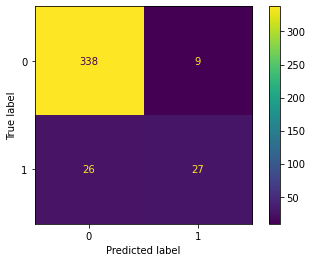

In [24]:
_ = plot_confusion_matrix(rf, X_test, y_test, values_format='')
_ = plt.grid(False)
plt.show()

11


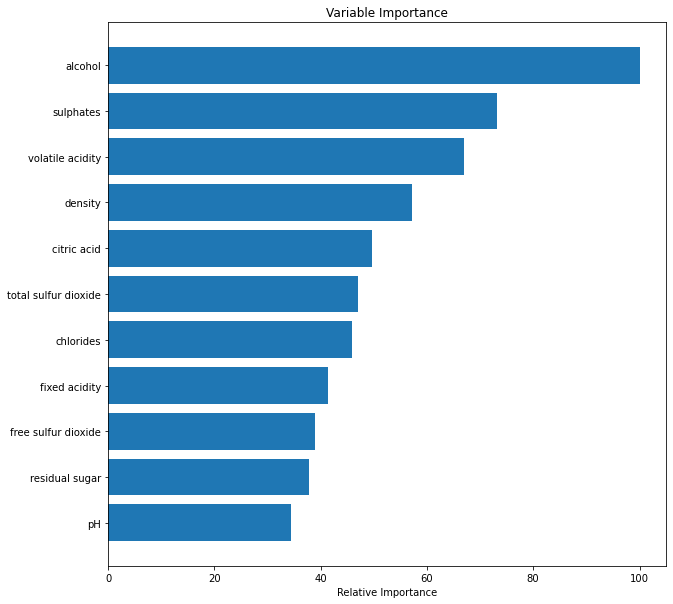

In [25]:
feature_importance = rf.feature_importances_
feature_importance = 100.0*(feature_importance/feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [33]:
rf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"]}
rf = RandomForestClassifier()
rf_cv= GridSearchCV(estimator=rf,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1)
rf_cv.fit(X_train,y_train)

In [66]:
print(rf_cv.best_estimator_)
print(rf_cv.best_score_)

RandomForestClassifier(criterion='entropy')
0.9099407252440725
